TODO: 
- combine pbl + crm + dyn

In [1]:
import numpy as np 
import xarray as xr 
import MJO_E3SM_util as mjo
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt 
import pickle
import os 
%load_ext autoreload
%autoreload 2

In [2]:
# directory that stores all case data
dirn = '/pscratch/sd/l/linyaoly/MJO_E3SM_data/regridded_data/'
case_dir = 'control'
case_dir = 'FIX_QRT'
case_dir = 'GBL_QRT'

In [3]:
lat_lim_olr = 10
kmax = 9
Tlow = 100
Thig = 20
flg = str(lat_lim_olr)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
output_path = dirn+'analysis/local_MSE_budget/composite_local_MSE_budget_'+case_dir+flg+'.nc'  
comp = xr.open_dataset(output_path)

In [4]:
def plot_comp(data, vmin=None, vmax=None, cbflg=False, figname=None, clevel=7):
    ftsize = 32
    plt.rcParams.update({'font.size': ftsize})
    fig, ax = plt.subplots(1,1, figsize=(11.5,5.5))
    if vmin is None:
        vmin = np.min(-np.abs(data))
        vmax = np.max(np.abs(data))
        vmin = np.min([vmin, -vmax])
        vmax = np.max([vmax, -vmin])
        
    # ax.set_title(key, pad=20)
    if cbflg:
        v = np.linspace(vmin, vmax, clevel)
        levels = np.linspace(vmin, vmax, 25)    
        im = ax.contourf(data.lon, data.lev, data, cmap='RdBu_r', levels=levels, vmin=vmin, vmax=vmax)
    
        cb = plt.colorbar(im, ticks=v, ax=ax)
        cb.ax.set_label('Values')
    else:
        im = ax.contourf(data.lon, data.lev, data, cmap='RdBu_r', levels=25, vmin=vmin, vmax=vmax)
    
    # ax.set_xlabel('longitude')
    # ax.set_ylabel('pressure (hPa)')
    ax.invert_yaxis()    
    ax.set_xticks(np.arange(0,361,90))
    ax.set_yticks([800, 600, 400, 200])
    ax.tick_params(axis='both', labelsize=ftsize, which='major', length=10, width=1.5)
    if figname is not None:
        plt.savefig(figname, bbox_inches='tight')


In [5]:
# make directory for figures
fig_dir = './plots/'+case_dir+'/'+'vertical_comp/'
os.system('mkdir -p '+fig_dir)

0

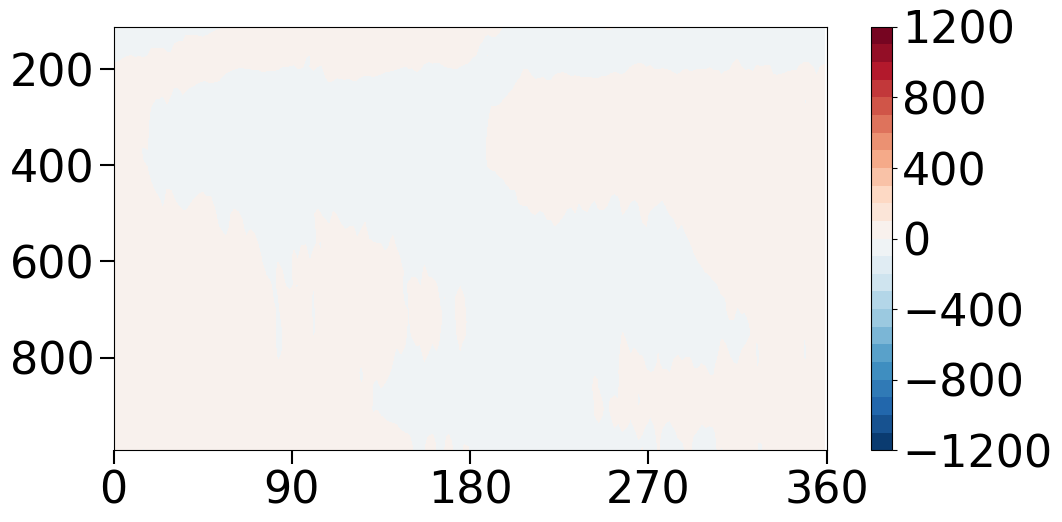

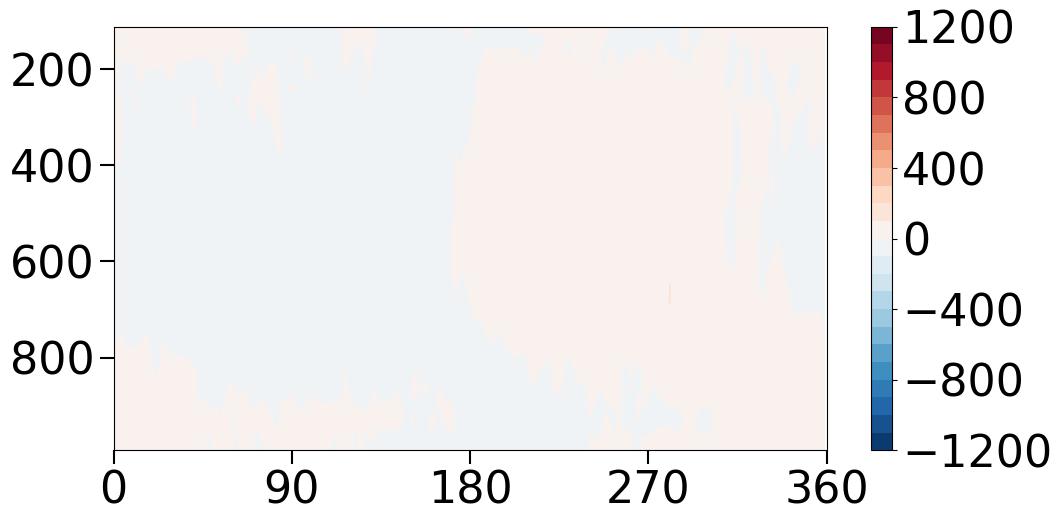

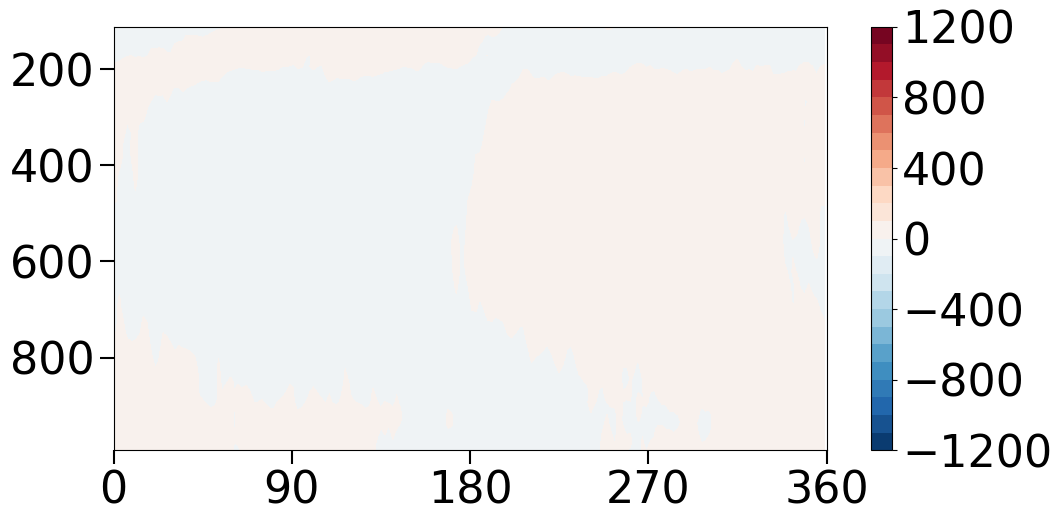

In [6]:
cbflg = True

maxflg = 0

vmax = 1200

# crm and pbl 
# print(var_prefix)
# DSE
data = (comp['crm_dse'] + comp['pbl_dse'] + comp['dyn_dse']).sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
figname = fig_dir+case_dir+'_crm+pbl+dyn_dse.png'
plot_comp(data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

# QLV
data1 = (comp['crm_qlv'] + comp['pbl_qlv'] + comp['dyn_qlv']).sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
figname = fig_dir+case_dir+'_crm+pbl+dyn_qlv.png'
plot_comp(data1, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

# MSE
figname = fig_dir+case_dir+'_crm+pbl+dyn_mse.png'
plot_comp(data1+data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)


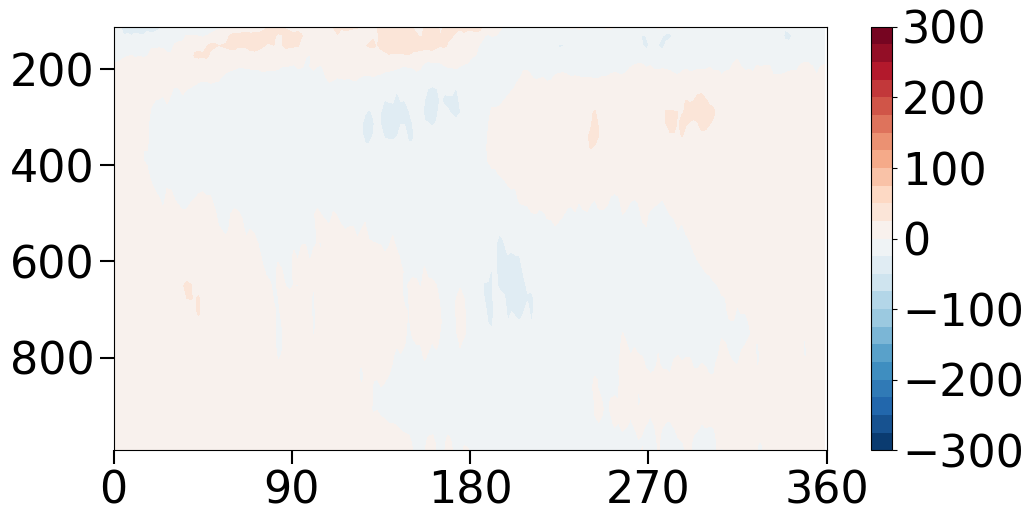

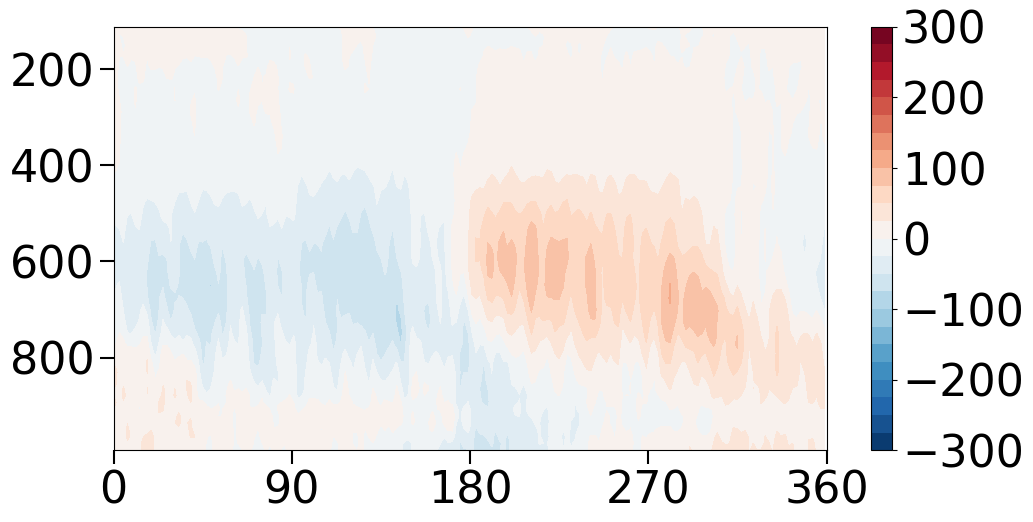

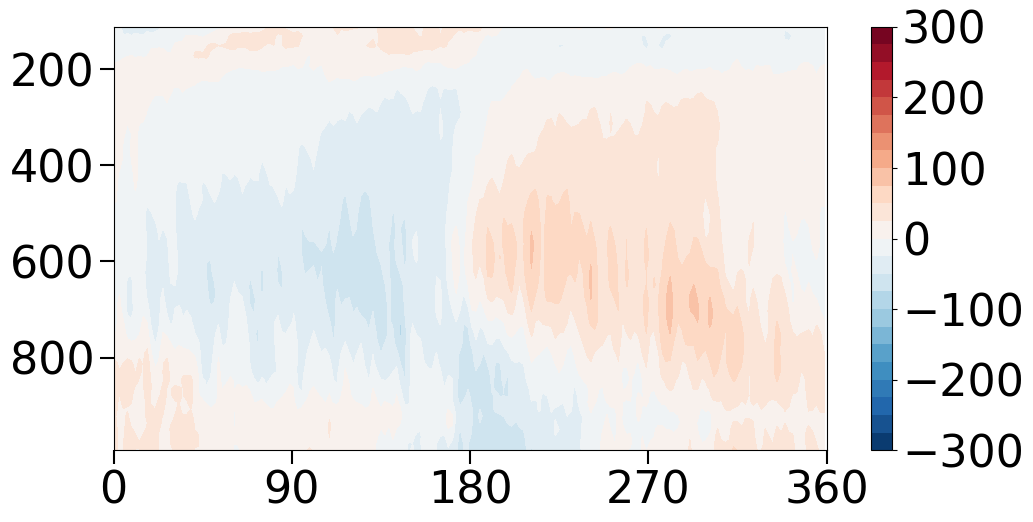

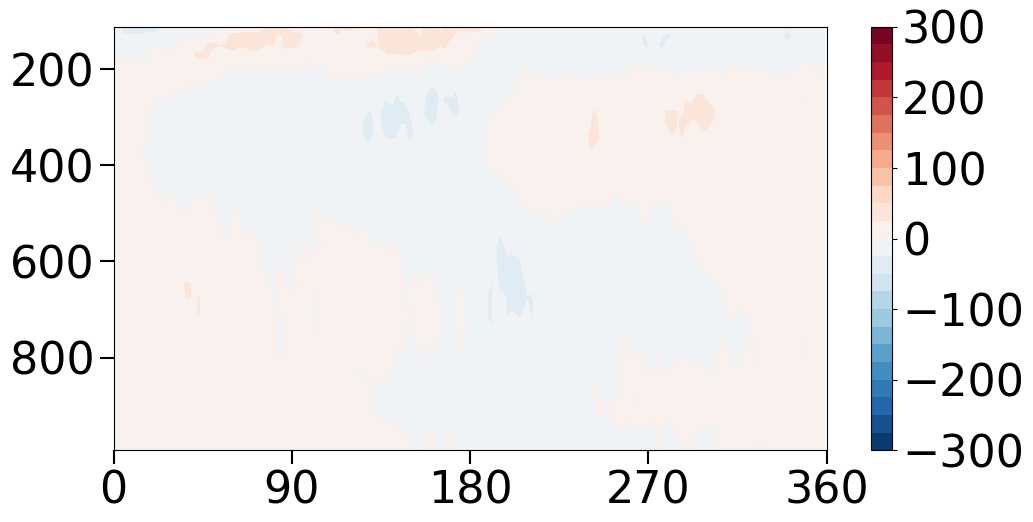

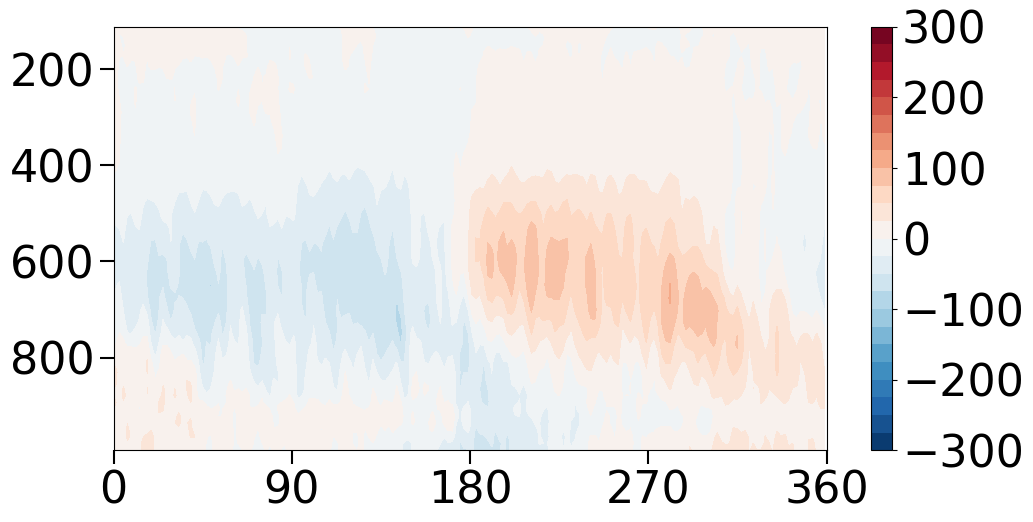

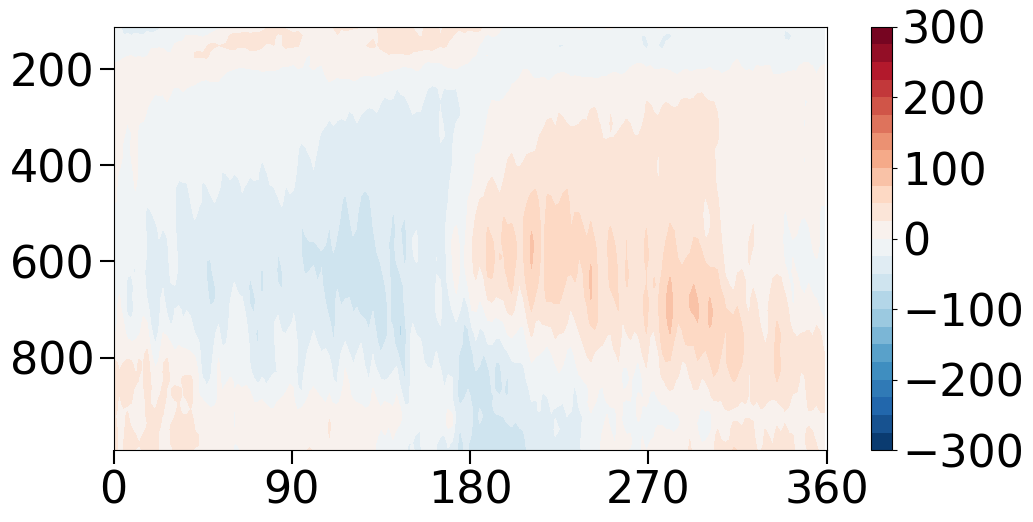

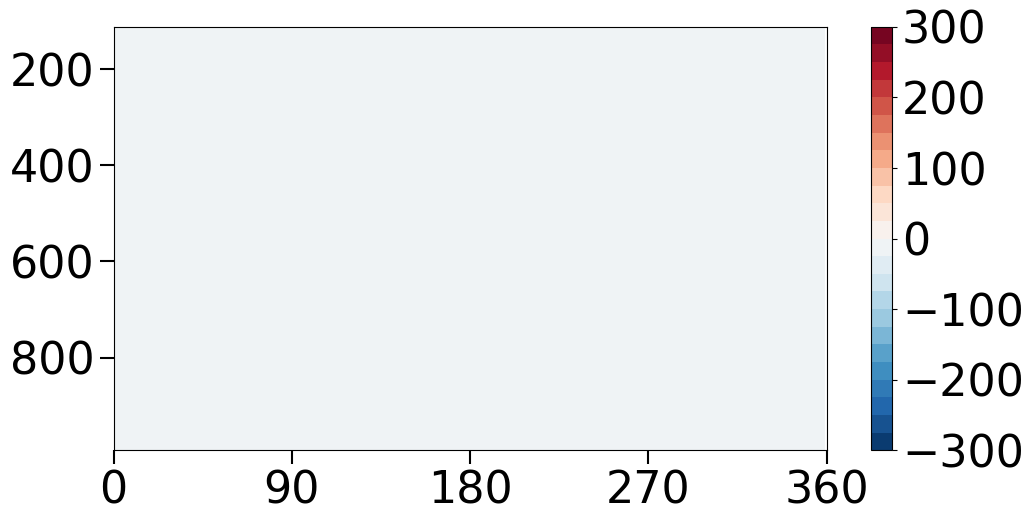

In [7]:
cbflg = True

maxflg = 0

vmax = 300

# tendency
# print(var_prefix)
# DSE
data = (comp['dtdse']).sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
figname = fig_dir+case_dir+'_dtdse_newcolorrange.png'
plot_comp(data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

# QLV
data1 = (comp['dtqlv']).sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
figname = fig_dir+case_dir+'_dtqlv_newcolorrange.png'
plot_comp(data1, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

# MSE
figname = fig_dir+case_dir+'_dtmse_newcolorrange.png'
plot_comp(data1+data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)


# crm and pbl 
# print(var_prefix)
# DSE
data = (comp['crm_dse'] + comp['pbl_dse'] + comp['dyn_dse']).sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
figname = fig_dir+case_dir+'_crm+pbl+dyn_dse_newcolorrange.png'
plot_comp(data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

# QLV
data1 = (comp['crm_qlv'] + comp['pbl_qlv'] + comp['dyn_qlv']).sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
figname = fig_dir+case_dir+'_crm+pbl+dyn_qlv_newcolorrange.png'
plot_comp(data1, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

# MSE
figname = fig_dir+case_dir+'_crm+pbl+dyn_mse_newcolorrange.png'
plot_comp(data1+data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)


# radiation
# print(var_prefix)
# DSE
data = (comp['qr']).sel(lat=slice(-lat_lim_olr,lat_lim_olr)).mean(dim='lat')  # [lev, lon]
figname = fig_dir+case_dir+'_qr_newcolorrange.png'
plot_comp(data, vmin=-vmax, vmax=vmax, cbflg=cbflg, figname=figname)

Case: control
Case: FIX_QRT
Case: GBL_QRT


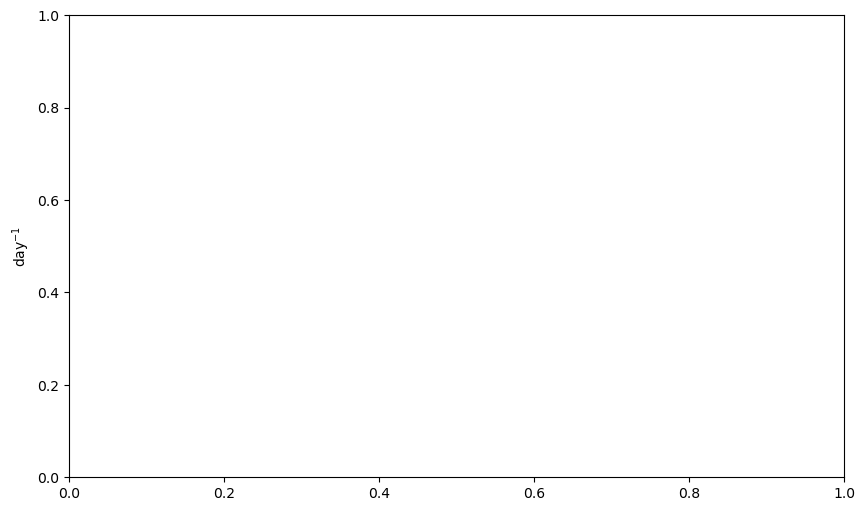

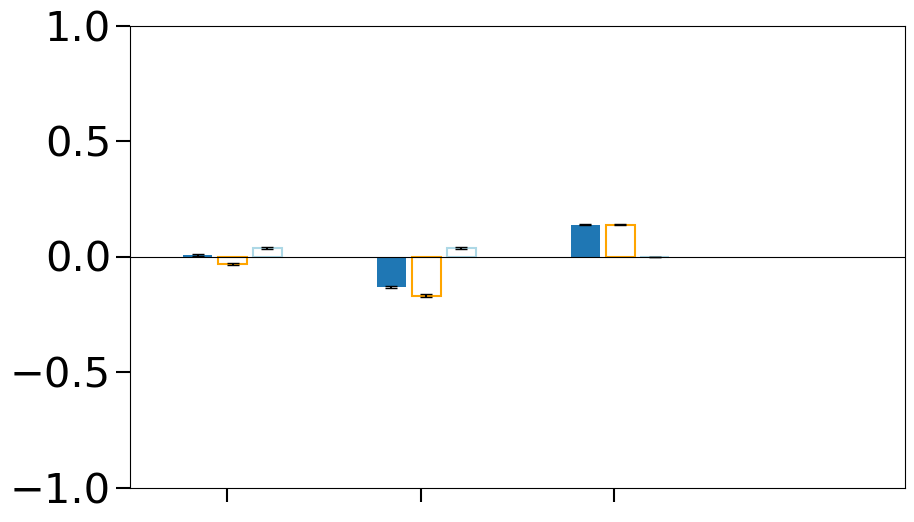

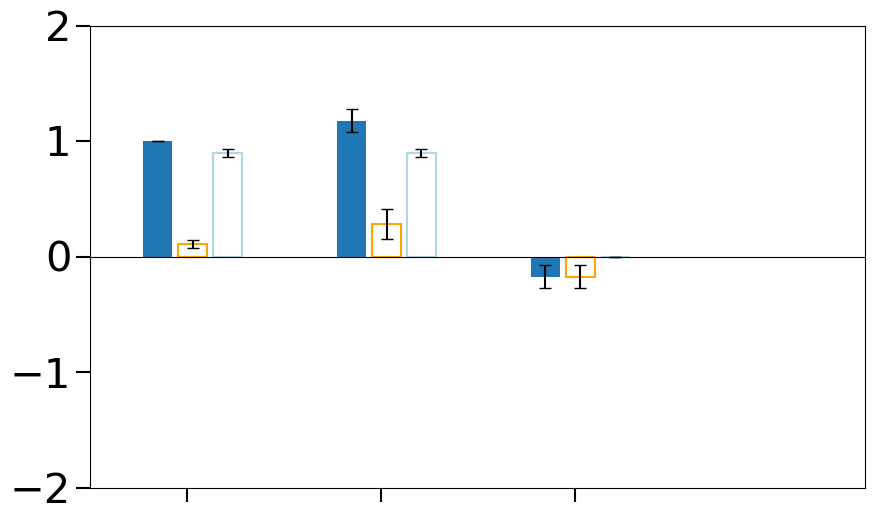

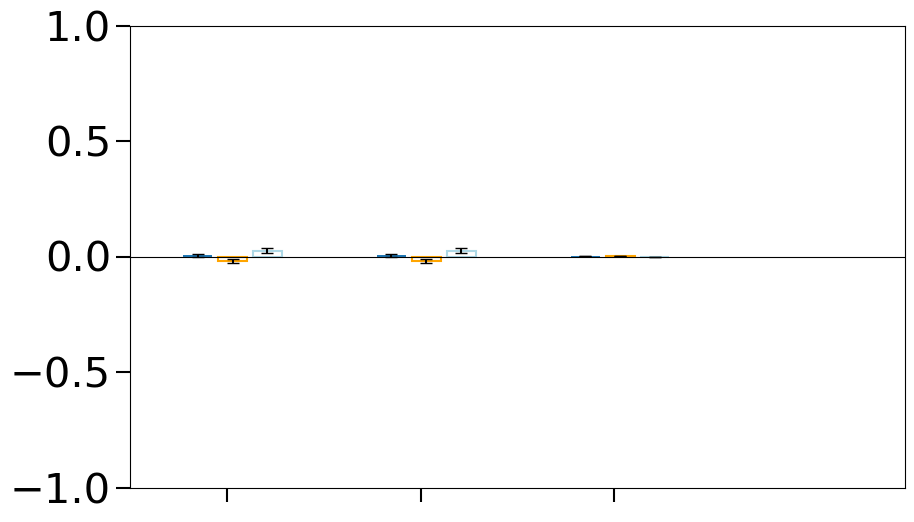

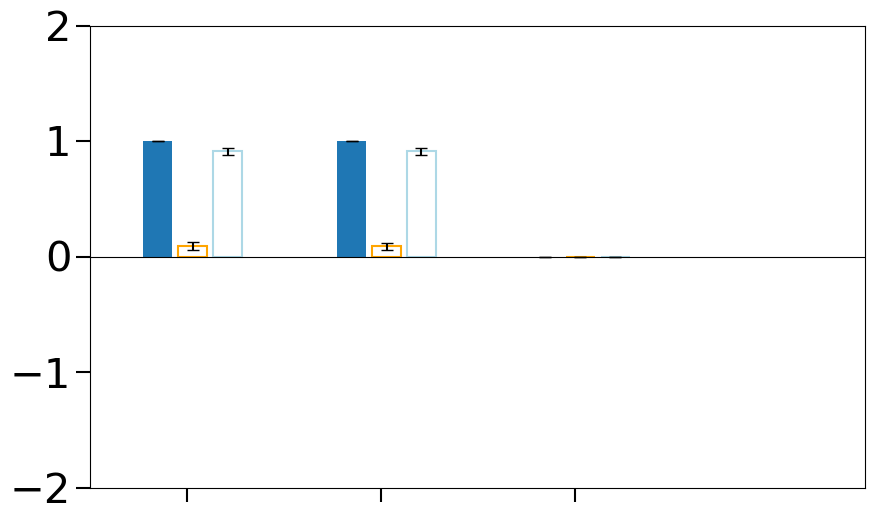

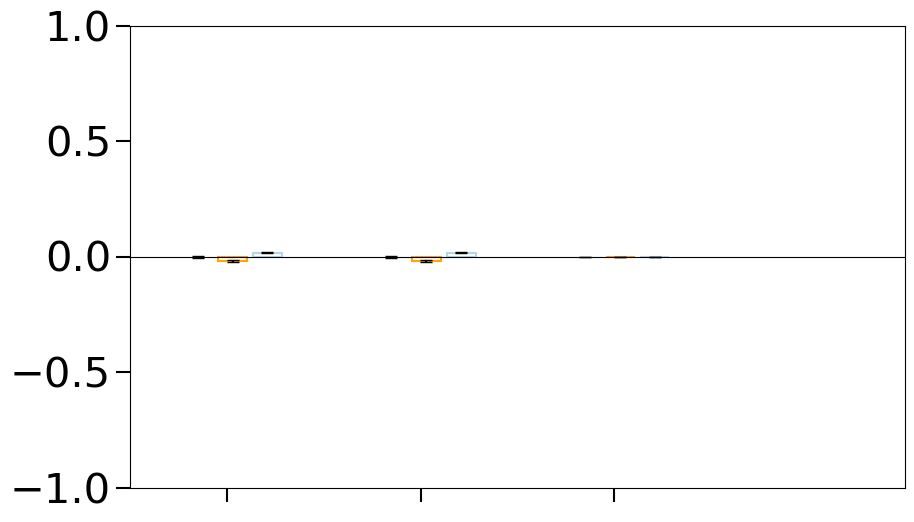

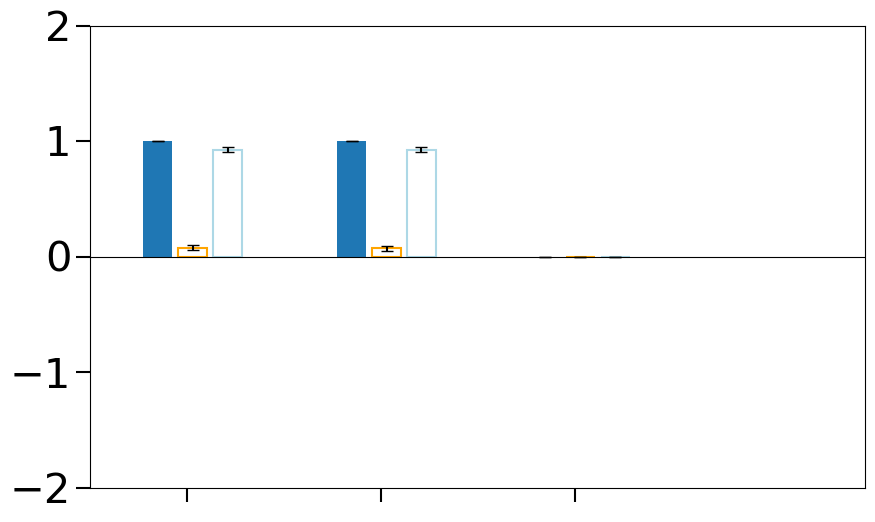

In [1]:
import numpy as np 
import xarray as xr 
import MJO_E3SM_util as mjo
import pandas as pd 
import matplotlib.pyplot as plt 
import pickle

def get_comp_4(comp):
    comp5 = {}
    comp5['mse'] = comp['dse'].load() + comp['qlv'].load()
    comp5['tendency'] = comp['dtdse'].load() + comp['dtqlv'].load()
    comp5['crmpbldyn'] = comp['crm_dse'].load() + comp['crm_qlv'].load() + comp['pbl_dse'].load() + comp['pbl_qlv'].load() + comp['dyn_dse'].load() + comp['dyn_qlv'].load()
    # comp5['dyn'] = comp['dyn_dse'].load() + comp['dyn_qlv'].load()
    comp5['qr'] = comp['qr'].load()

    return comp5

def get_comp_5_new(comp):
    comp8 = {}
    comp8['mse'] = comp['dse'].load() + comp['qlv'].load()
    comp8['tendency'] = comp['dtdse'].load() + comp['dtqlv'].load()
    comp8['tendency_d'] = comp['dtdse'].load() 
    comp8['tendency_m'] = comp['dtqlv'].load()
    comp8['crmpbldyn_d'] = comp['crm_dse'].load() + comp['pbl_dse'].load() + comp['dyn_dse'].load()
    comp8['crmpbldyn_m'] = comp['crm_qlv'].load() + comp['pbl_qlv'].load() + comp['dyn_qlv'].load()
    # comp8['dyn_d'] = comp['dyn_dse'].load()
    # comp8['dyn_m'] = comp['dyn_qlv'].load()
    comp8['qr'] = comp['qr'].load()

    return comp8

fig0, ax0 = plt.subplots(figsize=(10, 6))
plt.rcParams.update({'font.size': 30})
plt.ylabel('day$^{-1}$')

# directory that stores all case data
dirn = '/pscratch/sd/l/linyaoly/MJO_E3SM_data/regridded_data/'

for case_dir in ['control', 'FIX_QRT', 'GBL_QRT']:
    develop_uncertainty = {}
    develop_uncertainty['Tendency'] = []
    develop_uncertainty['CRMPBLDYN'] = []
    develop_uncertainty['Radiation'] = []

    for lat_lim in [5, 10, 15]:
        for kmax in [7, 9, 11]:
            for Tlow in [90, 100, 110, 150]:
                for Thig in [10, 20, 30]:
                    flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                    com_fn = dirn+'analysis/local_MSE_budget/composite_local_MSE_budget_'+case_dir+flg+'.nc'  
                    comp_tmp = xr.open_dataset(com_fn).sel(lat=slice(-lat_lim, lat_lim))
                    comp = get_comp_4(comp_tmp)  # [lev, lat, lon]

                    local_budget_develop = {}
                    p = comp['mse']['lev']  # dataarray
                    dp = np.zeros(len(p))
                    dp[1:] = p[1:].values - p[0:-1].values
                    dp[0] = dp[1]  # hPa

                    dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                    # integrate over pressure levels
                    comp_int = {}

                    for key in comp.keys():
                        comp_int[key] = (comp[key] * dp / 9.8 * 100).sum(dim='lev') # [lat, lon]

                    for key in comp.keys():
                        local_budget_develop[key] = (comp_int['mse'] * comp_int[key]).mean(dim=['lon', 'lat'])  # domain average
                        
                    norm = local_budget_develop['mse'] 
                    develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                    develop_uncertainty['CRMPBLDYN'].append(local_budget_develop['crmpbldyn'] / norm)
                    develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                    # develop_uncertainty['Dynamics'].append(local_budget_develop['dyn'] / norm)

                    comp_tmp.close()
                    del comp

    tend = develop_uncertainty['Tendency']
    convd = develop_uncertainty['CRMPBLDYN'] 
    rad = develop_uncertainty['Radiation']
    # dynd = develop_uncertainty['Dynamics']

    tend_av = np.mean(tend)
    convd_av = np.mean(convd)
    rad_av = np.mean(rad)
    # dynd_av = np.mean(dynd)

    tend_std = np.std(tend)
    convd_std = np.std(convd)
    rad_std = np.std(rad)
    # dynd_std = np.std(dynd)

    develop_mse = [tend_av, convd_av, rad_av]
    develop_mse_std = [tend_std, convd_std, rad_std]  

    x4 = ['Tendency', 'CRM+PBL+DYN', 'Radiation']
    x_axis = np.arange(len(x4))

    develop_uncertainty = {}
    develop_uncertainty['Tendency_dry'] = []
    develop_uncertainty['Tendency_moist'] = []
    develop_uncertainty['CRMPBLDYN_dry'] = []
    develop_uncertainty['CRMPBLDYN_moist'] = []
    develop_uncertainty['Radiation'] = []
    # develop_uncertainty['Dynamics_dry'] = []
    # develop_uncertainty['Dynamics_moist'] = []

    for lat_lim in [5, 10, 15]:
        for kmax in [7, 9, 11]:
            for Tlow in [90, 100, 110, 150]:
                for Thig in [10, 20, 30]:
                    flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                    com_fn = dirn+'analysis/local_MSE_budget/composite_local_MSE_budget_'+case_dir+flg+'.nc'  
                    comp_tmp = xr.open_dataset(com_fn).sel(lat=slice(-lat_lim, lat_lim))
                    comp = get_comp_5_new(comp_tmp)

                    local_budget_develop = {}
                    p = comp['mse']['lev']  # dataarray
                    dp = np.zeros(len(p))
                    dp[1:] = p[1:].values - p[0:-1].values
                    dp[0] = dp[1]  # hPa

                    dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                    # integrate over pressure levels
                    comp_int = {}

                    for key in comp.keys():
                        comp_int[key] = (comp[key] * dp / 9.8 * 100).sum(dim='lev') # [lat, lon]

                    for key in comp.keys():
                        local_budget_develop[key] = (comp_int['mse'] * comp_int[key]).mean(dim=['lon', 'lat'])  # domain average
                       
                    norm = local_budget_develop['mse'] 
                    develop_uncertainty['Tendency_dry'].append(local_budget_develop['tendency_d'] / norm)
                    develop_uncertainty['Tendency_moist'].append(local_budget_develop['tendency_m'] / norm)
                    develop_uncertainty['CRMPBLDYN_dry'].append(local_budget_develop['crmpbldyn_d'] / norm)
                    develop_uncertainty['CRMPBLDYN_moist'].append(local_budget_develop['crmpbldyn_m'] / norm)
                    develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                    # develop_uncertainty['Dynamics_dry'].append(local_budget_develop['dyn_d'] / norm)
                    # develop_uncertainty['Dynamics_moist'].append(local_budget_develop['dyn_m'] / norm)
                    
                    comp_tmp.close()
                    del comp

    tendd = develop_uncertainty['Tendency_dry']
    tendm = develop_uncertainty['Tendency_moist']
    convd = develop_uncertainty['CRMPBLDYN_dry'] 
    convm = develop_uncertainty['CRMPBLDYN_moist'] 
    rad = develop_uncertainty['Radiation']
    # dynd = develop_uncertainty['Dynamics_dry']
    # dynm = develop_uncertainty['Dynamics_moist']

    tendd_av = np.mean(tendd)
    tendm_av = np.mean(tendm)
    convd_av = np.mean(convd)
    convm_av = np.mean(convm)
    rad_av = np.mean(rad)
    # dynd_av = np.mean(dynd)
    # dynm_av = np.mean(dynm)

    tendd_std = np.std(tendd)
    tendm_std = np.std(tendm)
    convd_std = np.std(convd)
    convm_std = np.std(convm)
    rad_std = np.std(rad)
    # dynd_std = np.std(dynd)
    # dynm_std = np.std(dynm)

    develop_dse = [tendd_av, convd_av, rad_av]
    develop_dse_std = [tendd_std, convd_std, rad_std]

    develop_qlv = [tendm_av, convm_av, 0]
    develop_qlv_std = [tendm_std, convm_std, 0]

    # Define the width of each bar and the spacing between bar groups
    bar_width = 0.15
    spacing = 0.03  # Space between bars within a group
    group_width = (bar_width + spacing) * 2  # Width of each group of bars

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.rcParams.update({'font.size': 30})

    # Adjust the position of each bar
    for i in range(len(x_axis)):
        ax.bar(x_axis[i] - group_width / 2 + spacing, develop_mse[i], yerr=develop_mse_std[i], capsize=4, ecolor='black', width=bar_width, color='tab:blue')
        ax.bar(x_axis[i] - group_width / 2 + bar_width + 2 * spacing, develop_dse[i], yerr=develop_dse_std[i], capsize=4, ecolor='black', width=bar_width, color='white', edgecolor='orange', linewidth=1.5)
        ax.bar(x_axis[i] - group_width / 2 + 2 * bar_width + 3 * spacing, develop_qlv[i], yerr=develop_qlv_std[i], capsize=4, ecolor='black', width=bar_width, color='white', edgecolor='lightblue', linewidth=1.5)

    ax.plot([-1,4],[0,0],'k-',linewidth=0.8)

    ax.set_xticks(x_axis, ['','',''])
    # ax.set_ylabel("day" + r'$^{-1}$')
    ax.set_ylim([-1.0,1.0])
    ax.set_xlim([-0.5,3.5])
    # ax.set_yticks([-0.5,-0.5,0,0.5,1])
    ax.tick_params(axis='both', which='major', length=10, width=1.5)
    plt.savefig('./plots/'+case_dir+'/VI_develop_3terms.pdf', bbox_inches='tight')

    develop_uncertainty = {}
    develop_uncertainty['Tendency'] = []
    develop_uncertainty['CRMPBLDYN'] = []
    develop_uncertainty['Radiation'] = []
    # develop_uncertainty['Dynamics'] = []

    for lat_lim in [5, 10, 15]:
        for kmax in [7, 9, 11]:
            for Tlow in [90, 100, 110, 150]:
                for Thig in [10, 20, 30]:
                    flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                    com_fn = dirn+'analysis/local_MSE_budget/composite_local_MSE_budget_'+case_dir+flg+'.nc'  
                    comp_tmp = xr.open_dataset(com_fn).sel(lat=slice(-lat_lim, lat_lim))
                    comp = get_comp_4(comp_tmp)

                    local_budget_develop = {}
                    p = comp['mse']['lev']  # dataarray
                    dp = np.zeros(len(p))
                    dp[1:] = p[1:].values - p[0:-1].values
                    dp[0] = dp[1]  # hPa

                    dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                    # integrate over pressure levels
                    comp_int = {}

                    for key in comp.keys():
                        comp_int[key] = (comp[key] * dp / 9.8 * 100).sum(dim='lev') # [lat, lon]

                    for key in comp.keys():
                        local_budget_develop[key] = (comp_int['tendency'] * comp_int[key]).mean(dim=['lon', 'lat'])  # domain average
                       
                    norm = local_budget_develop['tendency'] 
                    develop_uncertainty['Tendency'].append(local_budget_develop['tendency'] / norm)
                    develop_uncertainty['CRMPBLDYN'].append(local_budget_develop['crmpbldyn'] / norm)
                    develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                    # develop_uncertainty['Dynamics'].append(local_budget_develop['dyn'] / norm)

                    comp_tmp.close()
                    del comp

    tend = develop_uncertainty['Tendency']
    convd = develop_uncertainty['CRMPBLDYN'] 
    rad = develop_uncertainty['Radiation']
    # dynd = develop_uncertainty['Dynamics']

    tend_av = np.mean(tend)
    convd_av = np.mean(convd)
    rad_av = np.mean(rad)
    # dynd_av = np.mean(dynd)

    tend_std = np.std(tend)
    convd_std = np.std(convd)
    rad_std = np.std(rad)
    # dynd_std = np.std(dynd)

    propagation_mse = [tend_av, convd_av, rad_av]
    propagation_mse_std = [tend_std, convd_std, rad_std]  

    x4 = ['Tendency', 'CRM+PBL+DYN', 'Radiation']
    x_axis = np.arange(len(x4))

    develop_uncertainty = {}
    develop_uncertainty['Tendency_dry'] = []
    develop_uncertainty['Tendency_moist'] = []
    develop_uncertainty['CRMPBLDYN_dry'] = []
    develop_uncertainty['CRMPBLDYN_moist'] = []
    develop_uncertainty['Radiation'] = []
    # develop_uncertainty['Dynamics_dry'] = []
    # develop_uncertainty['Dynamics_moist'] = []

    for lat_lim in [5, 10, 15]:
        for kmax in [7, 9, 11]:
            for Tlow in [90, 100, 110, 150]:
                for Thig in [10, 20, 30]:
                    flg = str(lat_lim)+'_'+str(kmax)+'_'+str(Tlow)+'_'+str(Thig)
                    com_fn = dirn+'analysis/local_MSE_budget/composite_local_MSE_budget_'+case_dir+flg+'.nc'  
                    comp_tmp = xr.open_dataset(com_fn).sel(lat=slice(-lat_lim, lat_lim))
                    comp = get_comp_5_new(comp_tmp)

                    local_budget_develop = {}
                    p = comp['mse']['lev']  # dataarray
                    dp = np.zeros(len(p))
                    dp[1:] = p[1:].values - p[0:-1].values
                    dp[0] = dp[1]  # hPa

                    dp = xr.DataArray(dp, dims='lev', coords={'lev': p})

                    # integrate over pressure levels
                    comp_int = {}

                    for key in comp.keys():
                        comp_int[key] = (comp[key] * dp / 9.8 * 100).sum(dim='lev') # [lat, lon]

                    for key in comp.keys():
                        local_budget_develop[key] = (comp_int['tendency'] * comp_int[key]).mean(dim=['lon', 'lat'])  # domain average
                       
                    norm = local_budget_develop['tendency'] 
                    develop_uncertainty['Tendency_dry'].append(local_budget_develop['tendency_d'] / norm)
                    develop_uncertainty['Tendency_moist'].append(local_budget_develop['tendency_m'] / norm)
                    develop_uncertainty['CRMPBLDYN_dry'].append(local_budget_develop['crmpbldyn_d'] / norm)
                    develop_uncertainty['CRMPBLDYN_moist'].append(local_budget_develop['crmpbldyn_m'] / norm)
                    develop_uncertainty['Radiation'].append(local_budget_develop['qr'] / norm) 
                    # develop_uncertainty['Dynamics_dry'].append(local_budget_develop['dyn_d'] / norm)
                    # develop_uncertainty['Dynamics_moist'].append(local_budget_develop['dyn_m'] / norm)

                    comp_tmp.close()
                    del comp

    tendd = develop_uncertainty['Tendency_dry']
    tendm = develop_uncertainty['Tendency_moist']
    convd = develop_uncertainty['CRMPBLDYN_dry'] 
    convm = develop_uncertainty['CRMPBLDYN_moist'] 
    rad = develop_uncertainty['Radiation']
    # dynd = develop_uncertainty['Dynamics_dry']
    # dynm = develop_uncertainty['Dynamics_moist']

    tendd_av = np.mean(tendd)
    tendm_av = np.mean(tendm)
    convd_av = np.mean(convd)
    convm_av = np.mean(convm)
    rad_av = np.mean(rad)
    # dynd_av = np.mean(dynd)
    # dynm_av = np.mean(dynm)

    tendd_std = np.std(tendd)
    tendm_std = np.std(tendm)
    convd_std = np.std(convd)
    convm_std = np.std(convm)
    rad_std = np.std(rad)
    # dynd_std = np.std(dynd)
    # dynm_std = np.std(dynm)

    propagation_dse = [tendd_av, convd_av, rad_av]
    propagation_dse_std = [tendd_std, convd_std, rad_std]

    propagation_qlv = [tendm_av, convm_av, 0]
    propagation_qlv_std = [tendm_std, convm_std, 0]

    # Define the width of each bar and the spacing between bar groups
    bar_width = 0.15
    spacing = 0.03  # Space between bars within a group
    group_width = (bar_width + spacing) * 2  # Width of each group of bars

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.rcParams.update({'font.size': 30})

    # Adjust the position of each bar
    for i in range(len(x_axis)):
        ax.bar(x_axis[i] - group_width / 2 + spacing, propagation_mse[i], yerr=propagation_mse_std[i], capsize=4, ecolor='black', width=bar_width, color='tab:blue')
        ax.bar(x_axis[i] - group_width / 2 + bar_width + 2 * spacing, propagation_dse[i], yerr=propagation_dse_std[i], capsize=4, ecolor='black', width=bar_width, color='white', edgecolor='orange', linewidth=1.5)
        ax.bar(x_axis[i] - group_width / 2 + 2 * bar_width + 3 * spacing, propagation_qlv[i], yerr=propagation_qlv_std[i], capsize=4, ecolor='black', width=bar_width, color='white', edgecolor='lightblue', linewidth=1.5)

    ax.plot([-1,4],[0,0],'k-',linewidth=0.8)
    ax.tick_params(axis='both', which='major', length=10, width=1.5)
    ax.set_xticks(x_axis, ['','',''])
    # ax.set_ylabel("day" + r'$^{-1}$')
    # ax.set_ylim([-1.0,1.6])
    ax.set_ylim([-2.0,2.0])
    ax.set_xlim([-0.5,3.5])
    # ax.set_yticks([-1,-0.5,0,0.5,1,1.5])
    plt.savefig('./plots/'+case_dir+'/VI_propagation_3terms.pdf', bbox_inches='tight')

    print('Case:', case_dir)
